In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Bengaluru_House_Data.csv
Bengaluru_House_Data_df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
Bengaluru_House_Data_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
Bengaluru_House_Data_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<Figure size 432x864 with 0 Axes>

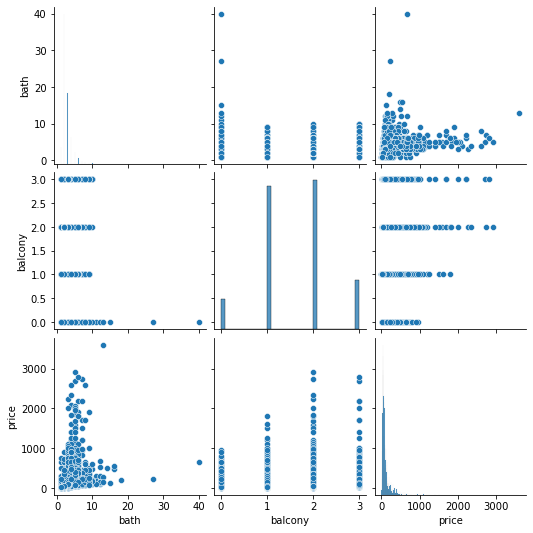

In [9]:
#Visualising all numeric variable
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,12))
sns.pairplot(Bengaluru_House_Data_df)
plt.show()

<AxesSubplot:>

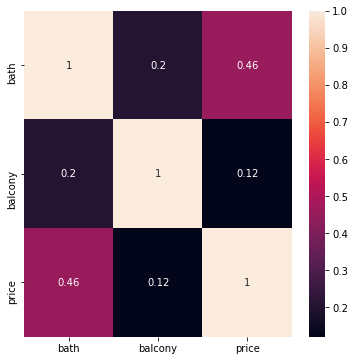

In [11]:
corre = Bengaluru_House_Data_df.corr()
corre

plt.figure(figsize=(6,6))
sns.heatmap(corre,annot=True)

In [4]:
Bengaluru_House_Data_df.shape

(13320, 9)

In [5]:
# checking count means type of categories of flat
Bengaluru_House_Data_df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
Bengaluru_House_Data_df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
Bengaluru_House_Data_df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

# Data cleaning

In [8]:
# Removing unused columns
col_to_drops = ['area_type','society','balcony','availability']
col_to_drops

['area_type', 'society', 'balcony', 'availability']

In [9]:
Bengaluru_House_Data_df.drop(columns = col_to_drops,inplace = True)

In [10]:
# Now columns count after removing columns with null values
Bengaluru_House_Data_df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
# making temp data frame to show percenage of missing value
na_df = pd.DataFrame({'Column_name':Bengaluru_House_Data_df.columns,
                      'Na_count':Bengaluru_House_Data_df.isnull().sum(),
                      'Na_percentage':Bengaluru_House_Data_df.isnull().sum()/Bengaluru_House_Data_df.shape[0]*100})
# sorting in Descending order 
na_df.sort_values(by='Na_percentage',ascending = False)

,Column_name,Na_count,Na_percentage
bath,bath,73,0.548048
size,size,16,0.120120
location,location,1,0.007508
total_sqft,total_sqft,0,0.000000
price,price,0,0.000000


In [12]:
# Droping missing value rows from Dataset
Bengaluru_House_Data_df.dropna(inplace = True)

In [13]:
Bengaluru_House_Data_df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
# Now rows count after removing rows with null values
Bengaluru_House_Data_df.shape

(13246, 5)

In [15]:
# Here in size column 3 word indicating no.of room i.e BHK,Bedroom,RK
Bengaluru_House_Data_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
# now instead of using 1 bhk now we use i or 2 
Bengaluru_House_Data_df['BHK'] = Bengaluru_House_Data_df['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
Bengaluru_House_Data_df

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
# different value of bedroom, hall & kitchen
Bengaluru_House_Data_df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
#we can see 43 bedroom house but there area is very less, its a error bcoz 2400 sfeet is very small for 43 bhk
Bengaluru_House_Data_df[Bengaluru_House_Data_df.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
# we can see some times value in range and some times single value..so take average of range value
Bengaluru_House_Data_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
# here total_sqft column is not uniform totly unstructured so we take average of Range no.
Bengaluru_House_Data_df[~Bengaluru_House_Data_df['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [23]:
def convert_sqrft_to_no(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
Bengaluru_House_Data_df['total_area'] = Bengaluru_House_Data_df['total_sqft'].apply(convert_sqrft_to_no)

In [25]:
# making new data frame for removing extra extra column we forget to remove i'e size and total_sqft
bng_house_data = Bengaluru_House_Data_df.copy()
bng_house_data.head(5)

,location,size,total_sqft,bath,price,BHK,total_area
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [26]:
# Removing unused columns
col_to_remove = ['total_sqft','size']

bng_house_data.drop(columns = col_to_remove,inplace = True)

In [27]:
bng_house_data.head(5)

,location,bath,price,BHK,total_area
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


# Feature Engineering

In [28]:
# Here we have 2 column price and total_area we all know in realstate price-per-sqrft is very imp
# This feature will help us do some outlier cleaing
# price in lakh
bng_house_data['price_per_sqrft'] = bng_house_data['price']*100000/bng_house_data['total_area']
bng_house_data.head(10)

,location,bath,price,BHK,total_area,price_per_sqrft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3.0,63.25,3,1310.0,4828.244275
9,Gandhi Bazar,6.0,370.00,6,1020.0,36274.509804


In [29]:
# checking area
bng_house_data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [30]:
# checking no of rows per location high no. of location/rows in area
len(bng_house_data['location'].unique())

1304

In [31]:
# we have lot of rows per area that's tough to handle this's called dimensionlity curse there r 
# techinque to reduce this one the effective techinque is "other category" which mean 
# when you have lot of location like 30405 in which many of 1-2 two area/data point to find this given below

In [32]:
# strping/remove extra space from location to clean tha data 
bng_house_data.location = bng_house_data.location.apply(lambda x: x.strip())
# checking statics of location
location_stats = bng_house_data.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats
# Here some location has many data point/area and some has only one 

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [33]:
# any location which has less than 10 data point is called other location now checking for no. of location having
# less than 10 data point

len(location_stats[location_stats<=10])

1052

In [34]:
# now checking for location having less than 10 data point
location_status_less_10 = location_stats[location_stats<=10]
location_status_less_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [35]:
# moving less than 10 data point to other
bng_house_data.location = bng_house_data.location.apply(lambda x: 'other' if x in location_status_less_10 else x)
len(bng_house_data.location.unique())

242

In [36]:
bng_house_data.head(10)

,location,bath,price,BHK,total_area,price_per_sqrft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3.0,63.25,3,1310.0,4828.244275
9,other,6.0,370.00,6,1020.0,36274.509804


# Outlier Removal

In [37]:
bng_house_data.shape

(13246, 6)

In [38]:
# here total_area data is incorrect W.R.T BHK cuz 6 room with 1020 ft and 8 room with 600ft 
# so we romove all these type of data point
bng_house_data[bng_house_data.total_area/bng_house_data.BHK<300].head(10)

,location,bath,price,BHK,total_area,price_per_sqrft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000
78,Kaval Byrasandra,1.0,22.0,2,460.0,4782.608696
89,Rajaji Nagar,6.0,160.0,6,710.0,22535.211268
119,Hennur Road,3.0,23.0,2,276.0,8333.333333
129,Vishwapriya Layout,7.0,115.0,7,950.0,12105.263158
149,other,5.0,185.0,6,1034.0,17891.682785


In [39]:
 # ccheck no. of rows in data frame
bng_house_data.shape

(13246, 6)

In [40]:
# removing some outliers by using nigate nigate use to filter on ur critrea set
# making df  
city_house_data = bng_house_data[~(bng_house_data.total_area/bng_house_data.BHK<300)]
city_house_data.shape

(12502, 6)

In [41]:
# checking now price_per_sqrft column using describe method its is used to checking detail about any column
# now can see minimum price in 267 sqrft is worng in banglore
# so we remove these cases based on standred deviation
city_house_data.price_per_sqrft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrft, dtype: float64

In [42]:
# here we write a function that can remove outliers per location cuz some location have price some have less price
# so we have to find mean and standred deviation and filter any data point which is beyond one standred deviation
def remove_pps_outliers(Bengaluru_House_Data_df):
    df_out = pd.DataFrame()
    for key, subdf in Bengaluru_House_Data_df.groupby('location'):
        m = np.mean(subdf.price_per_sqrft)
        st = np.std(subdf.price_per_sqrft)
        reduced_df = subdf[(subdf.price_per_sqrft>(m-st)) & (subdf.price_per_sqrft<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out    
# making df  
town_data = remove_pps_outliers(city_house_data)
town_data.shape

(10241, 6)

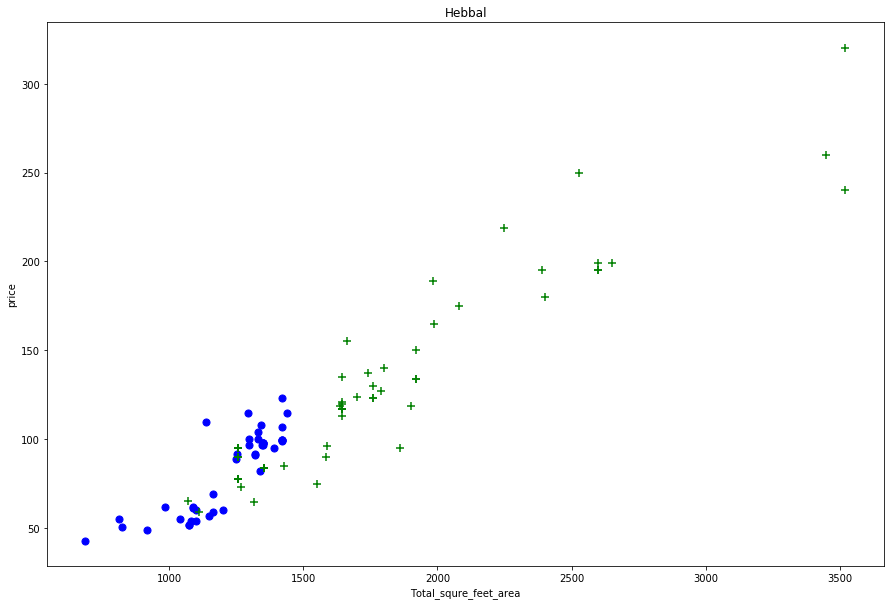

In [43]:
# again there is problem in room price 2 room price is costlier than 3 room so we need to visualize this
def plot_scatter_chart(Bengaluru_House_Data_df,location):
    bhk2 = Bengaluru_House_Data_df[(Bengaluru_House_Data_df.location==location) & (Bengaluru_House_Data_df.BHK==2)]
    bhk3 = Bengaluru_House_Data_df[(Bengaluru_House_Data_df.location==location) & (Bengaluru_House_Data_df.BHK==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_area,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_area,bhk3.price,marker= '+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total_squre_feet_area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend
        
plot_scatter_chart(town_data,"Hebbal") 

In [44]:
def remove_bhk_outlier(Bengaluru_House_Data_df):
    exclude_indices = np.array([])
    for location, location_df in Bengaluru_House_Data_df.groupby('location'):
        bhk_stats = {}
        for BHK,bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean':np.mean(bhk_df.price_per_sqrft),
                'std':np.std(bhk_df.price_per_sqrft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqrft<(stats['mean'])].index.values)
           
    return Bengaluru_House_Data_df.drop(exclude_indices,axis = 'index')
# making new df
land_data_df = remove_bhk_outlier(town_data)

land_data_df.shape        

(7464, 6)

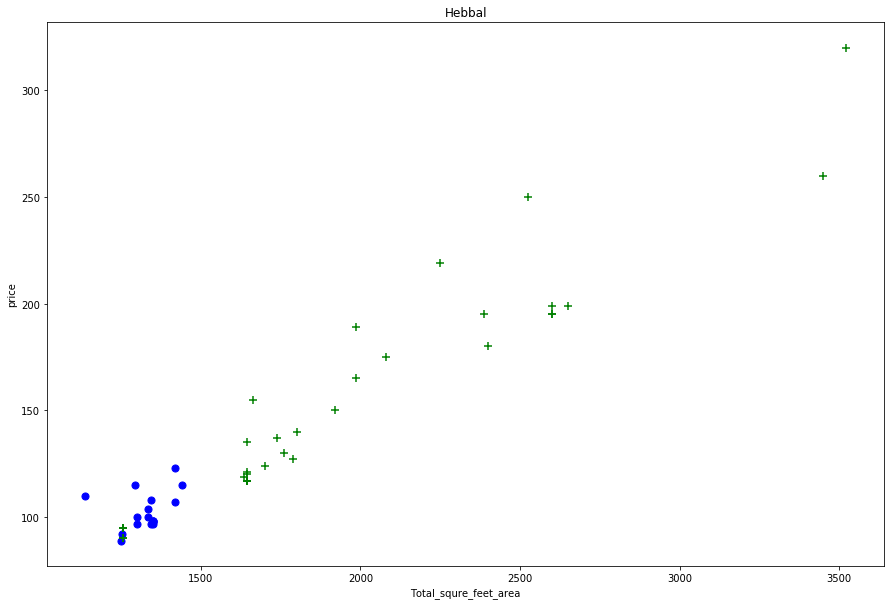

In [45]:
plot_scatter_chart(land_data_df,"Hebbal") 

Text(0, 0.5, 'count')

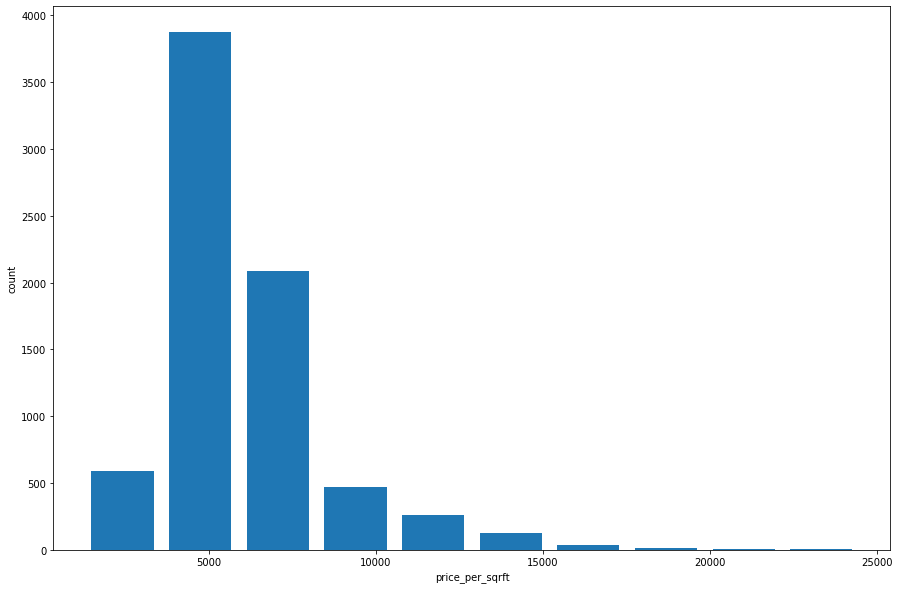

In [46]:
plt.hist(land_data_df.price_per_sqrft,rwidth=0.8)
plt.xlabel('price_per_sqrft')
plt.ylabel('count')

In [47]:
#checking no. of bathroom
land_data_df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
# checking bathroom with no. of bhk and area
land_data_df[land_data_df['bath']>10]

,location,bath,price,BHK,total_area,price_per_sqrft
5277,Neeladri Nagar,12.0,160.0,10,4000.0,4000.000000
8486,other,12.0,525.0,10,12000.0,4375.000000
8575,other,16.0,550.0,16,10000.0,5500.000000
9308,other,12.0,150.0,11,6000.0,2500.000000
9639,other,13.0,275.0,13,5425.0,5069.124424


In [49]:
# checking bathrom outlier
land_data_df[land_data_df.bath>land_data_df.BHK+2]

,location,bath,price,BHK,total_area,price_per_sqrft
1626,Chikkabanavar,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8411,other,9.0,1000.0,6,11338.0,8819.897689


In [50]:
# removing outlier and making new df
city_land_df = land_data_df[land_data_df.bath<land_data_df.BHK+2]
city_land_df.shape

(7381, 6)

In [51]:
# making new df
soil_final = city_land_df.drop('price_per_sqrft',axis='columns')
soil_final.head(5)

,location,bath,price,BHK,total_area
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


In [53]:
# here location column is text column and meachine learning model can not interpret text data so we convert into no.
# so we use one hot encoding
dummies = pd.get_dummies(soil_final.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# now we concate both data frame soil_final and dummies
data11 = pd.concat([soil_final,dummies],axis = 'columns')
data11

,location,bath,price,BHK,total_area,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,4.0,428.00,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.00,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.00,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.00,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.00,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,other,2.0,110.00,2,1353.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,other,1.0,26.00,1,812.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,other,2.0,63.93,3,1440.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,other,2.0,48.00,2,1075.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
